# Идентификация личности по манере набора текста.
## Глава 1. Отбор параметров.
### Время удержания клавиши нажатой.

Сначала попробуем посмотреть характеризует ли пользователя длительность удержания клавиши нажатой. Для определенности условимся, что длительность удержания клавиши нажатой равна разности между временем отпускания кнопки и временем её нажатия (с учетом того, что отпускание всегда следует после нажатия).

In [2]:
from db_provider import Provider
from  models import Unit, KEY_PRESS_UNIT_TYPE, KEY_RELEASE_UNIT_TYPE
from chapter_one.utils import get_key_activation_sequence, get_average
from utils import get_inputs_sequence
import matplotlib.pyplot as plt
%matplotlib inline

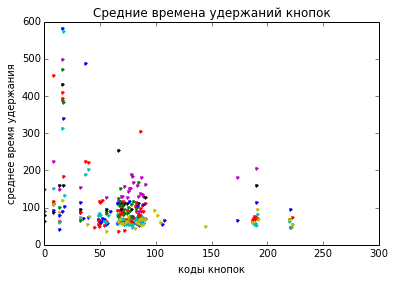

In [5]:
provider = Provider("database/research_db.sqlite3")
subjects = provider.get_all_subjects()

for subject in subjects:
    avr = get_average(
        get_key_activation_sequence(
            get_inputs_sequence(
                provider.get_all_units_by_subject_id(
                    subject
                ),
                is_raw=True
            )
        )
    )
    plt.plot(list(avr.keys()), list(avr.values()), '.')
plt.axis([0,300,0,600])
plt.title("Средние времена удержаний кнопок")
plt.xlabel("коды кнопок")
plt.ylabel("среднее время удержания")
plt.show()

Если рассматривать время удержания каждой клавиши в среднем, получаем, что все данные кучкуются в одной и той же области пространства. Этот параметр в чистом виде ничего толкового не даст.

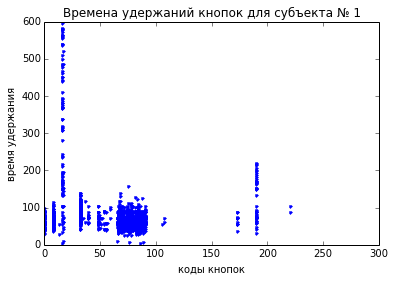

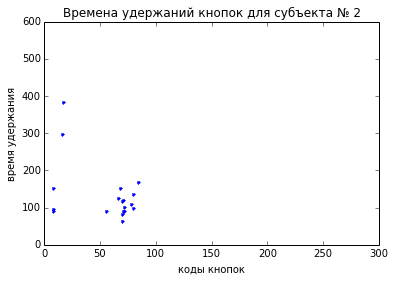

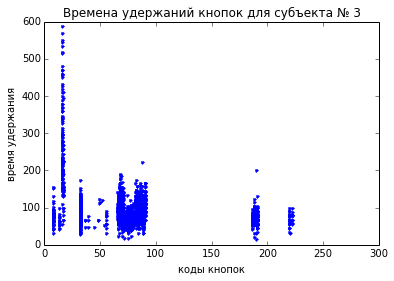

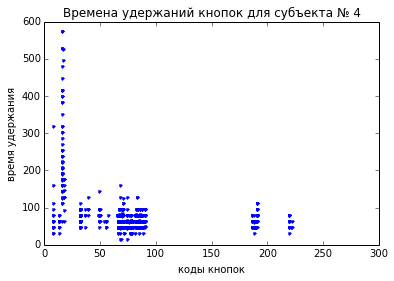

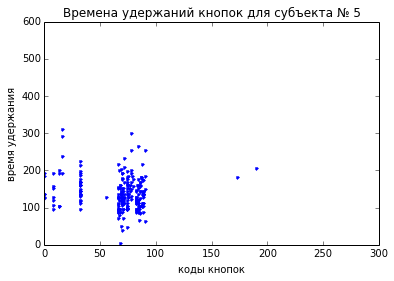

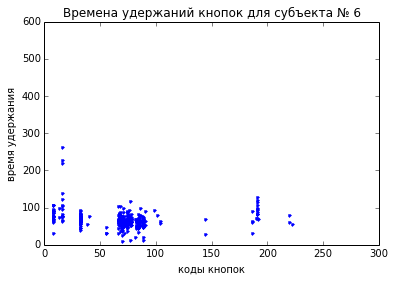

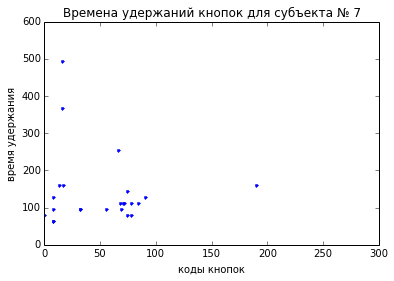

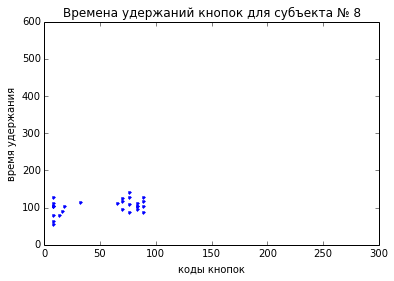

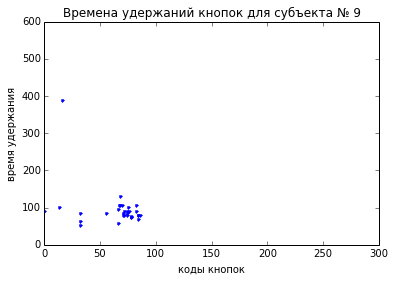

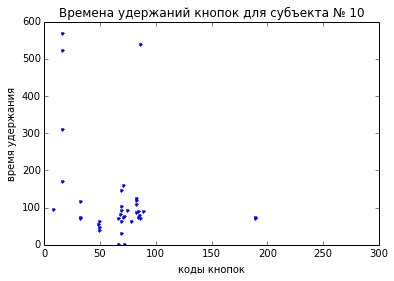

In [7]:
for subject in subjects:
    acts = get_key_activation_sequence(
        get_inputs_sequence(
            provider.get_all_units_by_subject_id(
                subject
            ),
            is_raw=True
        )
    )
    keys = []
    dur = []
    for act in acts:
        keys.append(act.key)
        dur.append(act.activity_duration)
    plt.axis([0,300,0,600])
    plt.plot(keys, dur, '.')
    plt.title("Времена удержаний кнопок для субъекта № {}".format(subject))
    plt.xlabel("коды кнопок")
    plt.ylabel("время удержания")
    plt.show()

Видно что каждый пользователь относительно этого параметра ведет себя приблизительно как и остальные.

### Расстояния между нажатиями.
Под расстоянием между нажатиями клавишь будем считать время прошедшее в период между отпусканием n кнопки и нажатием (n+1) кнопки. В случаях, когда (n+1) кнопка нажата до того как отпущена n, следуя вышеприведенному правилу, будем получать отрицательные расстояния.
Считать расстояния будем только в пределах одного сообщения, т.к. подсчет расстояний между концом и началом соседних сообщений скорее всего окажет только отрицательное влияние на результаты анализа.


In [10]:
from utils import remove_duplicates, remove_intermediate_pressing
inputs = get_inputs_sequence(provider.get_all_units_by_subject_id(3), is_raw=True)
for _input in inputs:
    print(_input)

<16: 1438028344994 - 1438028346734>
<17: 1438028345733 - 1438028345958>
<71: 1438028346596 - 1438028346730>
<72: 1438028346934 - 1438028347012>
<66: 1438028347100 - 1438028347188>
<68: 1438028347144 - 1438028347309>
<84: 1438028347263 - 1438028347364>
<78: 1438028347312 - 1438028347386>
<13: 1438028347525 - 1438028347579>
<16: 1438028405814 - 1438028406035>
<74: 1438028405946 - 1438028406014>
<16: 1438028406230 - 1438028406416>
<191: 1438028406307 - 1438028406373>
<32: 1438028406419 - 1438028406509>
<71: 1438028406661 - 1438028406750>
<72: 1438028406753 - 1438028406772>
<66: 1438028406890 - 1438028406955>
<68: 1438028406911 - 1438028407055>
<84: 1438028407034 - 1438028407144>
<78: 1438028407088 - 1438028407186>
<32: 1438028407189 - 1438028407311>
<74: 1438028407307 - 1438028407386>
<78: 1438028407461 - 1438028407537>
<71: 1438028407504 - 1438028407591>
<72: 1438028407644 - 1438028407714>
<70: 1438028407711 - 1438028407824>
<68: 1438028407790 - 1438028407900>
<66: 1438028407977 - 143802